<a href="https://colab.research.google.com/github/uol-mediaprocessing-2021-2022/class_material/blob/main/Practical_intro_to_ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Introduction to Artificial Neural Networks

import the needed modules

In [1]:
import tensorflow as tf
import numpy as np

here we load the MNIST dataset


In [2]:
from tensorflow.keras.datasets import mnist
(x, y), (x_val, y_val) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Let us explore a little bit the dataset

In [3]:
x.shape

(60000, 28, 28)

We have 6000 images a 28*28

let us visualize the first image, index =0

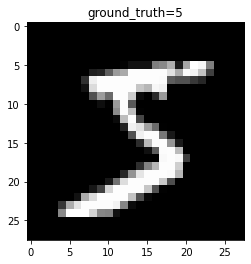

In [4]:
import matplotlib.pyplot as plt
i=0
plt.title("ground_truth="+ str(y[i]))
plt.imshow(x[i], cmap="gray")

In [5]:
x[i]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

We need to preprocess the data before we feed it into the network. 
1. a feed forward network works better with values between 0 and 1.
Therefore we need to normalize our input vectors, deviding all element by 255

In [6]:
x = x.astype('float32') / 255
x_val = x_val.astype('float32') / 255

In [7]:
x.shape

(60000, 28, 28)

In [8]:
x = np.expand_dims(x, -1)
x_val = np.expand_dims(x_val, -1)

In [9]:
x.shape

(60000, 28, 28, 1)

In [10]:
y.shape

(60000,)

0 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2 = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [11]:
y = tf.keras.utils.to_categorical(y)
y_val = tf.keras.utils.to_categorical(y_val)

In [12]:
y.shape

(60000, 10)

Here we import the modules needed to build our first FFN


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

In [14]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(46, activation='relu'),
    Dense(10, activation='softmax')
])

In [15]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                1518      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                470       
Total params: 54,308
Trainable params: 54,308
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x, y, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2908 - accuracy: 0.9148 - val_loss: 0.1488 - val_accuracy: 0.9536
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1319 - accuracy: 0.9609 - val_loss: 0.1145 - val_accuracy: 0.9644
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0963 - accuracy: 0.9697 - val_loss: 0.1130 - val_accuracy: 0.9674
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0783 - accuracy: 0.9754 - val_loss: 0.0953 - val_accuracy: 0.9717
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0650 - accuracy: 0.9793 - val_loss: 0.0960 - val_accuracy: 0.9712
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0559 - accuracy: 0.9827 - val_loss: 0.1067 - val_accuracy: 0.9697
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0497 - accuracy: 0.9837 - val_loss: 0.1007 - val_accuracy:

In [18]:
prediction = model.predict(x_val[0:1])
np.round(prediction)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

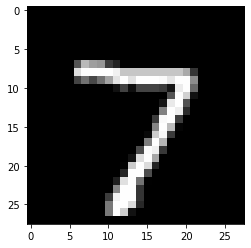

In [19]:
plt.imshow(x_val[0,...,0], cmap="gray")